In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skt
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
import sklearn.metrics as metrics

### Features para Temperatura Minima

In [2]:
target= ['Precipitação Acum.(mm)']
features = ['Altitude(metros)',
                         'Latitude',
                         'Longitude',
                         'UMIDADE RELATIVA DO MAXIMA AR (%)',
                         'UMIDADE RELATIVA DO MINIMA AR (%)',
                         'TEMPERATURA MAXIMA (C)',
                        'TEMPERATURA MINIMA (C)']
features

['Altitude(metros)',
 'Latitude',
 'Longitude',
 'UMIDADE RELATIVA DO MAXIMA AR (%)',
 'UMIDADE RELATIVA DO MINIMA AR (%)',
 'TEMPERATURA MAXIMA (C)',
 'TEMPERATURA MINIMA (C)']

### Criando o dataframe que ira guardar os valores das metricas

In [230]:
data_prep_erros = pd.DataFrame(columns=['Month','Qto_estacoes','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE'])

### Pegando as base de dados do primeiro mês


In [231]:
data_mean_jan = pd.read_csv('../Dados/Brasil_1_mean.csv')

In [233]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jan[features], 
                                                    data_mean_jan[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,.9))
scaler_y = MinMaxScaler(feature_range=(0.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)


mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.00001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.6419024424617084
MAE: 37.51075001646585
MSE: 2603.047724066635
MSLE: 0.10335486743362908
MedLE: 26.10659942090703
R2 Score: 0.6395170176726908
Error(UR_true - UR_pred)
MIN: 1.2050304802724838 	MAX: 183.69595392950723 	MEAN: 37.51075001646585	Std: 34.5831079758434


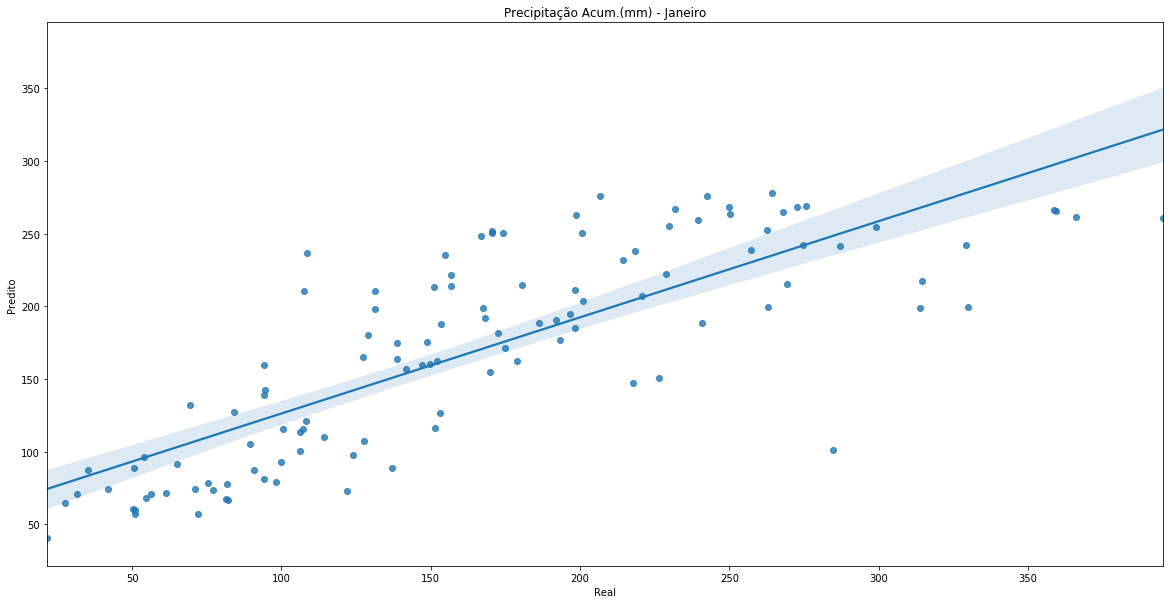

In [234]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.ylim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Janeiro')
plt.savefig('../Validacao/graph/Prep_jan.png')

In [235]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_prep_erros.loc[1]=['Janeiro',len(data_mean_jan),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_prep_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,37.51075,1.20503,183.695954,34.583108,0.641902,0.639517,37.51075,2603.047724,0.103355,26.106599


In [236]:
pickle.dump(mlp,open('../Models/Prep/prep_1.model2','wb'),protocol=2)

## Fevereiro

In [237]:
data_mean_fev = pd.read_csv('../Dados/Brasil_2_mean.csv')

In [278]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_fev[features], 
                                                    data_mean_fev[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,.9))
scaler_y = MinMaxScaler(feature_range=(0.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('Error(UR_true - UR_pred)')
print('MIN: {} \tMAX: {} \tMEAN: {}\tStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.6662395703186428
MAE: 33.15920753815683
MSE: 1833.7430731572729
MSLE: 0.15113804370034667
MedLE: 26.36793335879259
R2 Score: 0.6633824441653676
Error(UR_true - UR_pred)
MIN: 0.19150487839154096 	MAX: 119.65436778991676 	MEAN: 33.15920753815683	Std: 27.09631023956427


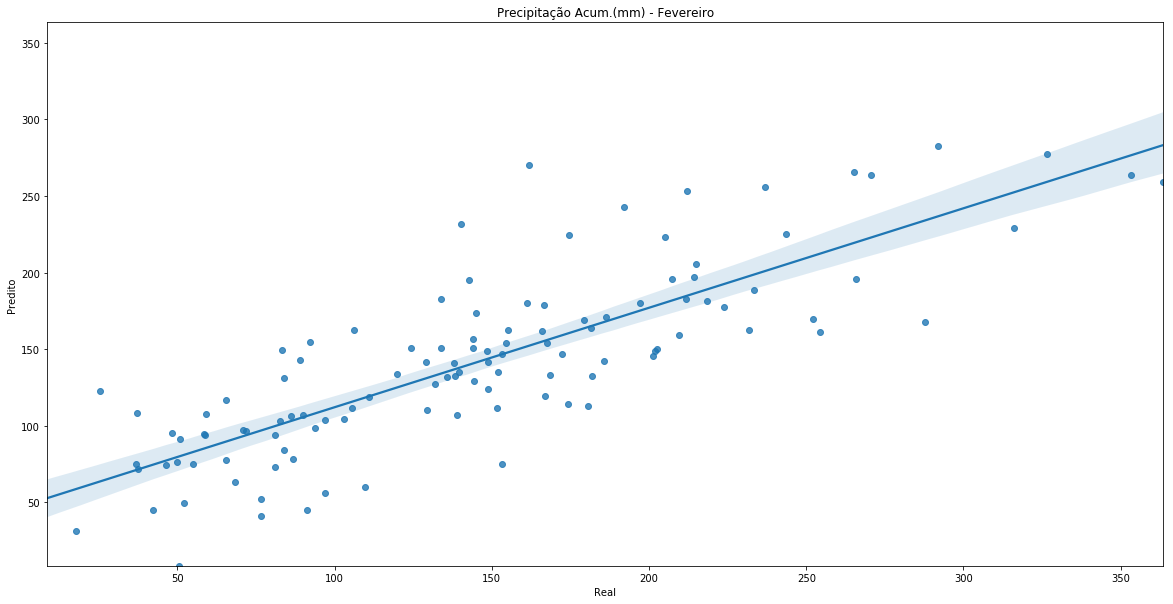

In [279]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.ylim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Fevereiro')
plt.savefig('../Validacao/graph/Prep_fev.png')

In [280]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_prep_erros.loc[2]=['Fevereiro',len(data_mean_fev),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_prep_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,37.510750,1.205030,183.695954,34.583108,0.641902,0.639517,37.510750,2603.047724,0.103355,26.106599
2,Fevereiro,458,33.159208,0.191505,119.654368,27.096310,0.666240,0.663382,33.159208,1833.743073,0.151138,26.367933


In [281]:
pickle.dump(mlp,open('../Models/Prep/prep_2.model2','wb'),protocol=2)

## Março

In [282]:
data_mean_mar = pd.read_csv('../Dados/Brasil_3_mean.csv')

In [315]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_mar[features], 
                                                    data_mean_mar[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,.9))
scaler_y = MinMaxScaler(feature_range=(0.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
#MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
#print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.5358746643789961
MAE: 42.74437449308885
MSE: 2737.9219517711244
MedLE: 37.53367368663339
R2 Score: 0.4798752425258771

Error(UR_true - UR_pred)

MIN: 0.2797543156000586 
MAX: 126.41241660508109 
MEAN: 42.74437449308885
Std: 30.180132553812633


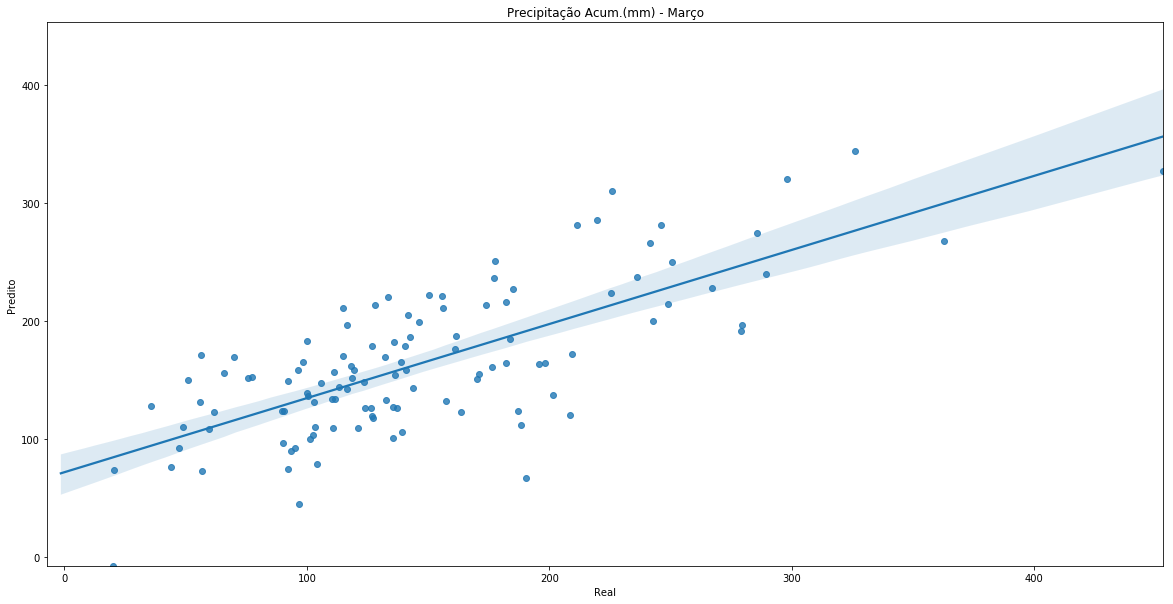

In [316]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.ylim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Março')
plt.savefig('../Validacao/graph/Prep_mar.png')

In [317]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_prep_erros.loc[3]=['Março',len(data_mean_mar),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_prep_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,37.510750,1.205030,183.695954,34.583108,0.641902,0.639517,37.510750,2603.047724,0.103355,26.106599
2,Fevereiro,458,33.159208,0.191505,119.654368,27.096310,0.666240,0.663382,33.159208,1833.743073,0.151138,26.367933
3,Março,458,42.744374,0.279754,126.412417,30.180133,0.535875,0.479875,42.744374,2737.921952,0.190652,37.533674


In [319]:
pickle.dump(mlp,open('../Models/Prep/prep_3.model2','wb'),protocol=2)

## Abril

In [320]:
data_mean_abr = pd.read_csv('../Dados/Brasil_4_mean.csv')

In [329]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_abr[features], 
                                                    data_mean_abr[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,.9))
scaler_y = MinMaxScaler(feature_range=(0.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.6370279045263285
MAE: 37.31059046933191
MSE: 2458.4984910679827
MSLE: 0.227812462099586
MedLE: 29.76295145079032
R2 Score: 0.6367108768608256

Error(UR_true - UR_pred)

MIN: 0.9331880555814109 
MAX: 169.1329450156867 
MEAN: 37.31059046933191
Std: 32.656061150998916


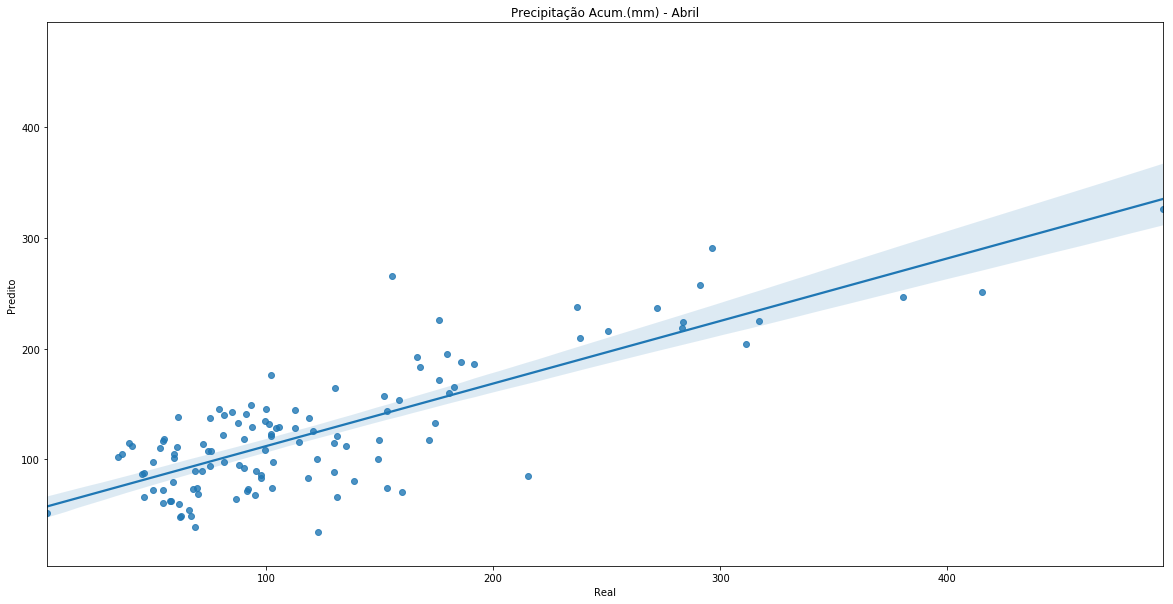

In [330]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.ylim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Abril')
plt.savefig('../Validacao/graph/Prep_abr.png')

In [349]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_prep_erros.loc[4]=['Abril',len(data_mean_abr),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_prep_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,37.510750,1.205030,183.695954,34.583108,0.641902,0.639517,37.510750,2603.047724,0.103355,26.106599
2,Fevereiro,458,33.159208,0.191505,119.654368,27.096310,0.666240,0.663382,33.159208,1833.743073,0.151138,26.367933
3,Março,458,42.744374,0.279754,126.412417,30.180133,0.535875,0.479875,42.744374,2737.921952,0.190652,37.533674
4,Abril,461,31.565042,0.183774,161.285655,25.597788,0.706531,0.702085,31.565042,1651.598608,0.227812,28.499556


In [350]:
pickle.dump(mlp,open('../Models/Prep/prep_4.model2','wb'),protocol=2)

## Maio

In [351]:
data_mean_mai = pd.read_csv('../Dados/Brasil_5_mean.csv')

In [352]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_mai[features], 
                                                    data_mean_mai[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,.9))
scaler_y = MinMaxScaler(feature_range=(0.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
#MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.720498430763906
MAE: 28.325301477529557
MSE: 2302.1095864309204
MSLE: 0.227812462099586
MedLE: 15.824774845392398
R2 Score: 0.7192893267327232

Error(UR_true - UR_pred)

MIN: 0.3077329998579188 
MAX: 330.5307943557246 
MEAN: 28.325301477529557
Std: 38.72708203102813


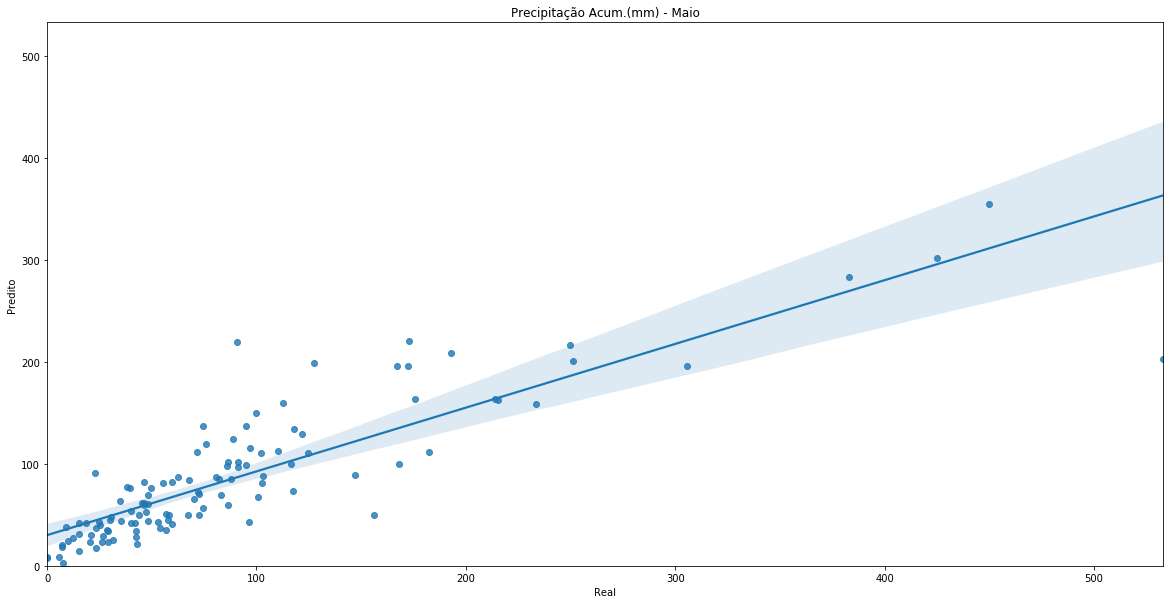

In [353]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(0,0),max(y_test.max(),y_pred.max())+.003))
plt.ylim((min(0,0),max(y_test.max(),y_pred.max())+.003))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Maio')
plt.savefig('../Validacao/graph/Prep_5.png')

In [354]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_prep_erros.loc[5]=['Maio',len(data_mean_mai),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_prep_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,37.510750,1.205030,183.695954,34.583108,0.641902,0.639517,37.510750,2603.047724,0.103355,26.106599
2,Fevereiro,458,33.159208,0.191505,119.654368,27.096310,0.666240,0.663382,33.159208,1833.743073,0.151138,26.367933
3,Março,458,42.744374,0.279754,126.412417,30.180133,0.535875,0.479875,42.744374,2737.921952,0.190652,37.533674
4,Abril,461,31.565042,0.183774,161.285655,25.597788,0.706531,0.702085,31.565042,1651.598608,0.227812,28.499556
5,Maio,461,28.325301,0.307733,330.530794,38.727082,0.720498,0.719289,28.325301,2302.109586,0.227812,15.824775


In [355]:
pickle.dump(mlp,open('../Models/Prep/prep_5.model2','wb'),protocol=2)

## Junho

In [356]:
data_mean_jun = pd.read_csv('../Dados/Brasil_6_mean.csv')

In [363]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jun[features], 
                                                    data_mean_jun[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,.9))
scaler_y = MinMaxScaler(feature_range=(0.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
#MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.6618430759512686
MAE: 26.17043616149498
MSE: 1876.325127665154
MSLE: 0.227812462099586
MedLE: 14.100511893030351
R2 Score: 0.6556817389297376

Error(UR_true - UR_pred)

MIN: 0.15285743374029437 
MAX: 205.11773907951314 
MEAN: 26.17043616149498
Std: 34.51714644611095


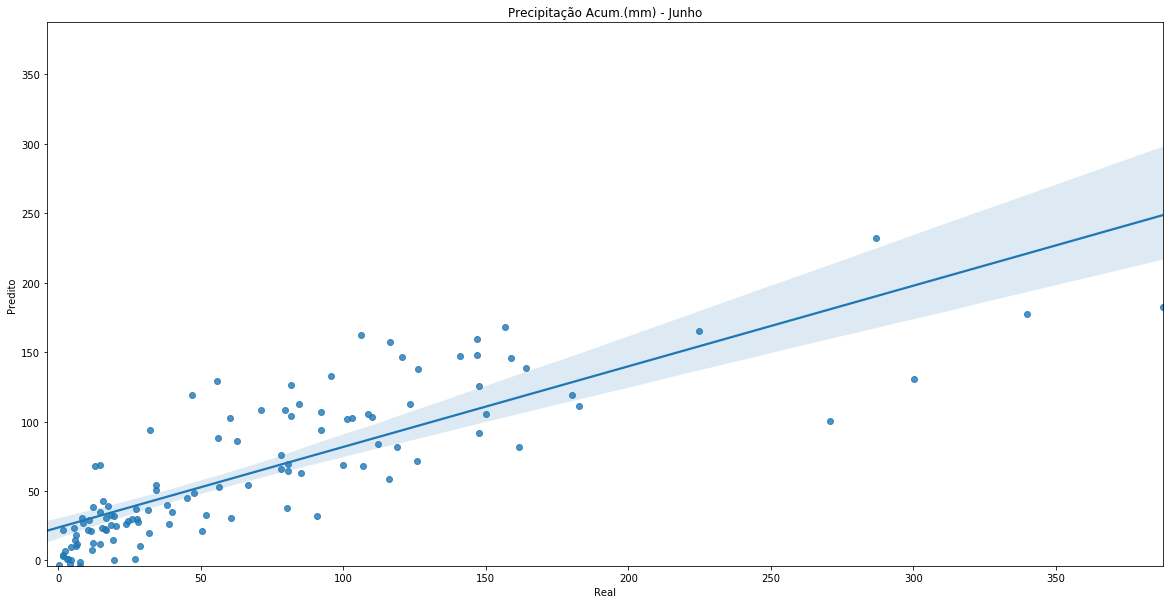

In [364]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.ylim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Junho')
plt.savefig('../Validacao/graph/Prep_jun.png')

In [365]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_prep_erros.loc[6]=['Junho',len(data_mean_jun),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_prep_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,37.510750,1.205030,183.695954,34.583108,0.641902,0.639517,37.510750,2603.047724,0.103355,26.106599
2,Fevereiro,458,33.159208,0.191505,119.654368,27.096310,0.666240,0.663382,33.159208,1833.743073,0.151138,26.367933
3,Março,458,42.744374,0.279754,126.412417,30.180133,0.535875,0.479875,42.744374,2737.921952,0.190652,37.533674
4,Abril,461,31.565042,0.183774,161.285655,25.597788,0.706531,0.702085,31.565042,1651.598608,0.227812,28.499556
5,Maio,461,28.325301,0.307733,330.530794,38.727082,0.720498,0.719289,28.325301,2302.109586,0.227812,15.824775
6,Junho,467,26.170436,0.152857,205.117739,34.517146,0.661843,0.655682,26.170436,1876.325128,0.227812,14.100512


In [366]:
pickle.dump(mlp,open('../Models/Prep/prep_6.model2','wb'),protocol=2)

## Julho

In [367]:
data_mean_jul = pd.read_csv('../Dados/Brasil_7_mean.csv')

In [369]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_jul[features], 
                                                    data_mean_jul[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,.9))
scaler_y = MinMaxScaler(feature_range=(0.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
#MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.8161883100490227
MAE: 16.584848683180482
MSE: 663.2768635474449
MSLE: 0.227812462099586
MedLE: 9.444404785855237
R2 Score: 0.8135335246310614

Error(UR_true - UR_pred)

MIN: 0.20895645257284912 
MAX: 116.5929304499743 
MEAN: 16.584848683180482
Std: 19.70329052984428


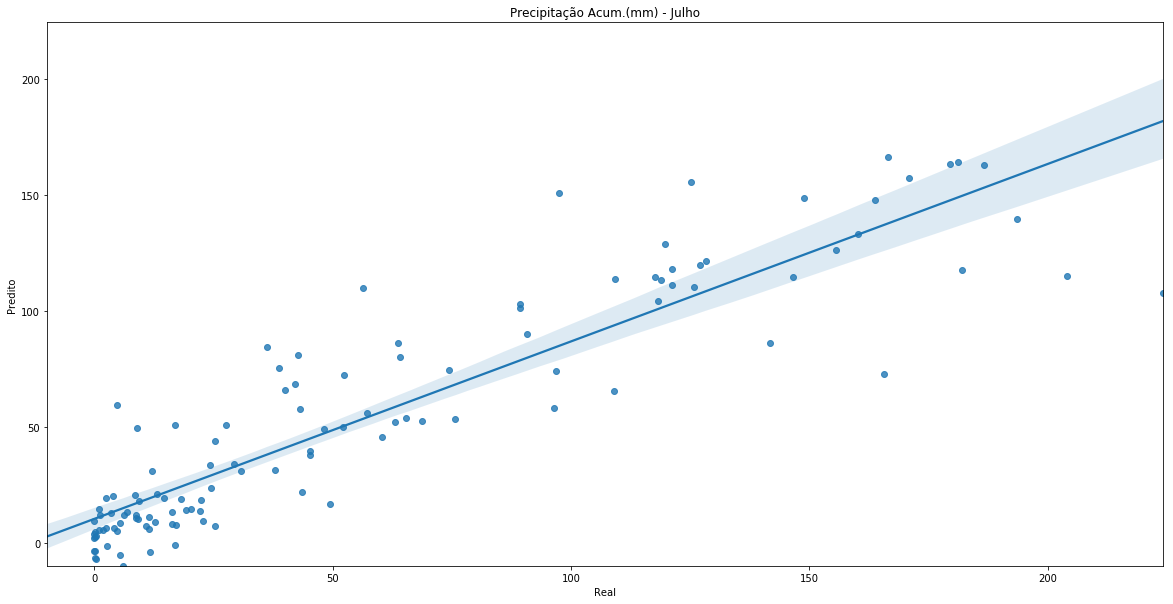

In [370]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.ylim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Julho')
plt.savefig('../Validacao/graph/Prep_jul.png')

In [371]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_prep_erros.loc[7]=['Julho',len(data_mean_jul),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_prep_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,37.510750,1.205030,183.695954,34.583108,0.641902,0.639517,37.510750,2603.047724,0.103355,26.106599
2,Fevereiro,458,33.159208,0.191505,119.654368,27.096310,0.666240,0.663382,33.159208,1833.743073,0.151138,26.367933
3,Março,458,42.744374,0.279754,126.412417,30.180133,0.535875,0.479875,42.744374,2737.921952,0.190652,37.533674
4,Abril,461,31.565042,0.183774,161.285655,25.597788,0.706531,0.702085,31.565042,1651.598608,0.227812,28.499556
5,Maio,461,28.325301,0.307733,330.530794,38.727082,0.720498,0.719289,28.325301,2302.109586,0.227812,15.824775
6,Junho,467,26.170436,0.152857,205.117739,34.517146,0.661843,0.655682,26.170436,1876.325128,0.227812,14.100512
7,Julho,467,16.584849,0.208956,116.592930,19.703291,0.816188,0.813534,16.584849,663.276864,0.227812,9.444405


In [372]:
pickle.dump(mlp,open('../Models/Prep/prep_7.model2','wb'),protocol=2)

## Agosto

In [373]:
data_mean_ago = pd.read_csv('../Dados/Brasil_8_mean.csv')

In [376]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_ago[features], 
                                                    data_mean_ago[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,.9))
scaler_y = MinMaxScaler(feature_range=(0.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
#MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.8466701771792197
MAE: 11.338749816072092
MSE: 296.8926736715253
MSLE: 0.227812462099586
MedLE: 7.004236130022105
R2 Score: 0.8455155964400998

Error(UR_true - UR_pred)

MIN: 0.12809577941629624 
MAX: 67.84293878888676 
MEAN: 11.338749816072092
Std: 12.97402891472231


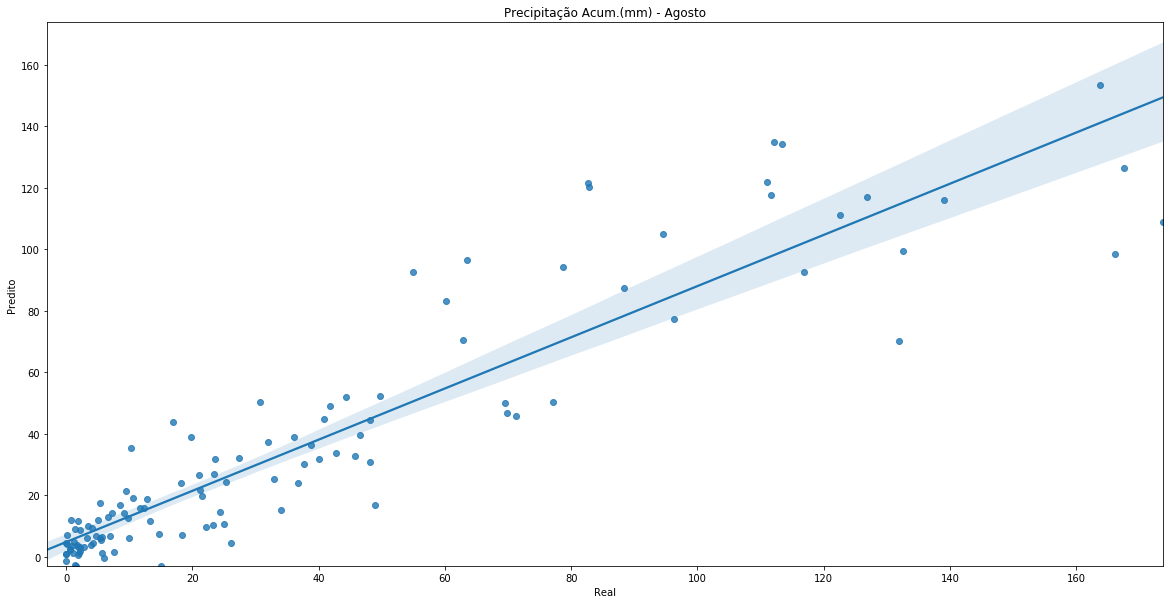

In [377]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.ylim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Agosto')
plt.savefig('../Validacao/graph/Prep_ago.png')

In [378]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_prep_erros.loc[8]=['Agosto',len(data_mean_ago),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_prep_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,37.510750,1.205030,183.695954,34.583108,0.641902,0.639517,37.510750,2603.047724,0.103355,26.106599
2,Fevereiro,458,33.159208,0.191505,119.654368,27.096310,0.666240,0.663382,33.159208,1833.743073,0.151138,26.367933
3,Março,458,42.744374,0.279754,126.412417,30.180133,0.535875,0.479875,42.744374,2737.921952,0.190652,37.533674
4,Abril,461,31.565042,0.183774,161.285655,25.597788,0.706531,0.702085,31.565042,1651.598608,0.227812,28.499556
5,Maio,461,28.325301,0.307733,330.530794,38.727082,0.720498,0.719289,28.325301,2302.109586,0.227812,15.824775
6,Junho,467,26.170436,0.152857,205.117739,34.517146,0.661843,0.655682,26.170436,1876.325128,0.227812,14.100512
7,Julho,467,16.584849,0.208956,116.592930,19.703291,0.816188,0.813534,16.584849,663.276864,0.227812,9.444405
8,Agosto,468,11.338750,0.128096,67.842939,12.974029,0.846670,0.845516,11.338750,296.892674,0.227812,7.004236


In [379]:
pickle.dump(mlp,open('../Models/Prep/prep_8.model2','wb'),protocol=2)

## Setembro

In [380]:
data_mean_set = pd.read_csv('../Dados/Brasil_9_mean.csv')

In [395]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_set[features], 
                                                    data_mean_set[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,.9))
scaler_y = MinMaxScaler(feature_range=(0.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
#MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.7453599981242123
MAE: 19.964211946022733
MSE: 710.7497786098116
MSLE: 0.227812462099586
MedLE: 13.363332805372057
R2 Score: 0.7444454117838271

Error(UR_true - UR_pred)

MIN: 0.17060604243243294 
MAX: 85.03694271398334 
MEAN: 19.964211946022733
Std: 17.668616810155083


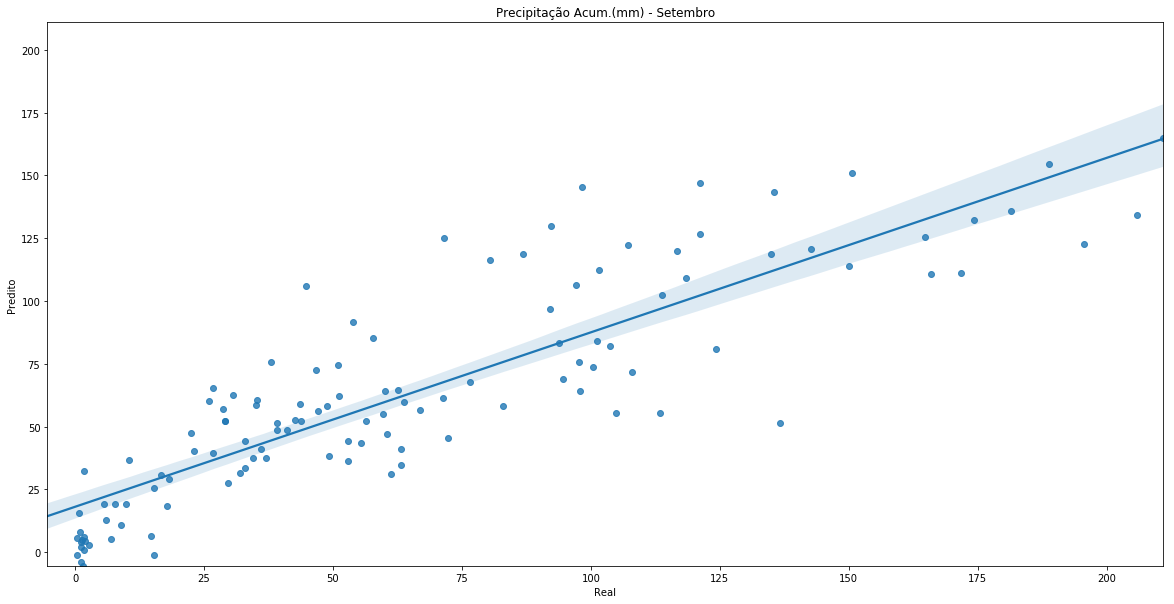

In [396]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.ylim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Setembro')
plt.savefig('../Validacao/graph/Prep_set.png')

In [397]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_prep_erros.loc[9]=['Setembro',len(data_mean_set),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_prep_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,37.510750,1.205030,183.695954,34.583108,0.641902,0.639517,37.510750,2603.047724,0.103355,26.106599
2,Fevereiro,458,33.159208,0.191505,119.654368,27.096310,0.666240,0.663382,33.159208,1833.743073,0.151138,26.367933
3,Março,458,42.744374,0.279754,126.412417,30.180133,0.535875,0.479875,42.744374,2737.921952,0.190652,37.533674
4,Abril,461,31.565042,0.183774,161.285655,25.597788,0.706531,0.702085,31.565042,1651.598608,0.227812,28.499556
5,Maio,461,28.325301,0.307733,330.530794,38.727082,0.720498,0.719289,28.325301,2302.109586,0.227812,15.824775
6,Junho,467,26.170436,0.152857,205.117739,34.517146,0.661843,0.655682,26.170436,1876.325128,0.227812,14.100512
7,Julho,467,16.584849,0.208956,116.592930,19.703291,0.816188,0.813534,16.584849,663.276864,0.227812,9.444405
8,Agosto,468,11.338750,0.128096,67.842939,12.974029,0.846670,0.845516,11.338750,296.892674,0.227812,7.004236
9,Setembro,470,19.964212,0.170606,85.036943,17.668617,0.745360,0.744445,19.964212,710.749779,0.227812,13.363333


In [398]:
pickle.dump(mlp,open('../Models/Prep/prep_9.model2','wb'),protocol=2)

## Outubro

In [399]:
data_mean_out = pd.read_csv('../Dados/Brasil_10_mean.csv')

In [418]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_out[features], 
                                                    data_mean_out[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,.9))
scaler_y = MinMaxScaler(feature_range=(.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.7243294210684827
MAE: 22.550784771341874
MSE: 803.100397458545
MSLE: 0.2263127563316283
MedLE: 18.129462334977404
R2 Score: 0.724230327733028

Error(UR_true - UR_pred)

MIN: 0.9856316904371427 
MAX: 85.61515261588931 
MEAN: 22.550784771341874
Std: 17.162823300819724


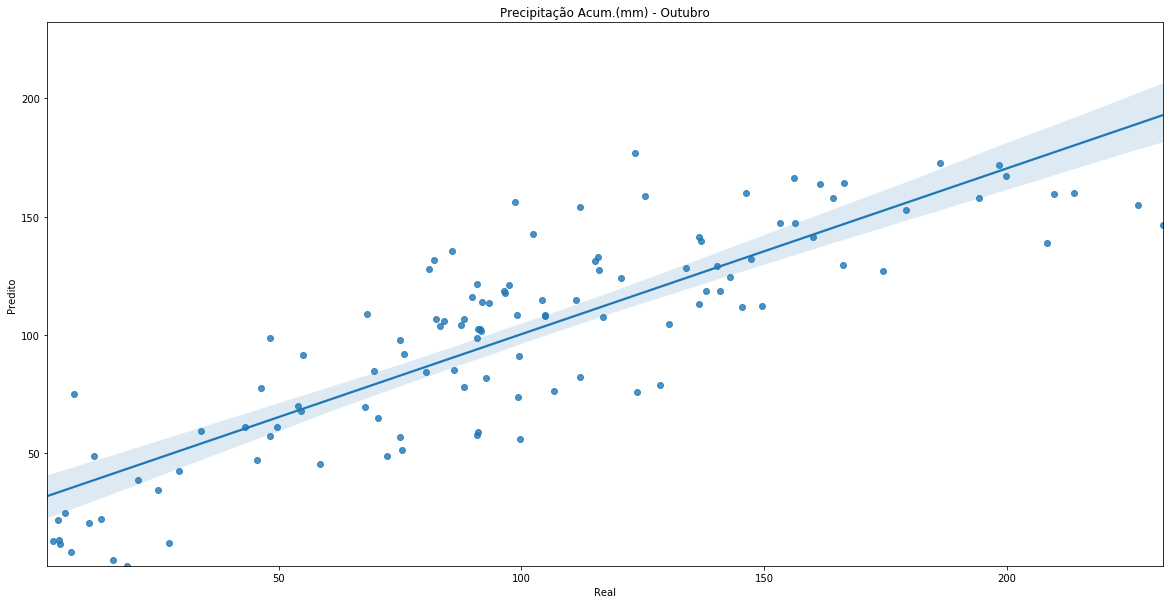

In [419]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.ylim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Outubro')
plt.savefig('../Validacao/graph/Prep_out.png')

In [420]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_prep_erros.loc[10]=['Outubro',len(data_mean_out),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_prep_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,37.510750,1.205030,183.695954,34.583108,0.641902,0.639517,37.510750,2603.047724,0.103355,26.106599
2,Fevereiro,458,33.159208,0.191505,119.654368,27.096310,0.666240,0.663382,33.159208,1833.743073,0.151138,26.367933
3,Março,458,42.744374,0.279754,126.412417,30.180133,0.535875,0.479875,42.744374,2737.921952,0.190652,37.533674
4,Abril,461,31.565042,0.183774,161.285655,25.597788,0.706531,0.702085,31.565042,1651.598608,0.227812,28.499556
5,Maio,461,28.325301,0.307733,330.530794,38.727082,0.720498,0.719289,28.325301,2302.109586,0.227812,15.824775
6,Junho,467,26.170436,0.152857,205.117739,34.517146,0.661843,0.655682,26.170436,1876.325128,0.227812,14.100512
7,Julho,467,16.584849,0.208956,116.592930,19.703291,0.816188,0.813534,16.584849,663.276864,0.227812,9.444405
8,Agosto,468,11.338750,0.128096,67.842939,12.974029,0.846670,0.845516,11.338750,296.892674,0.227812,7.004236
9,Setembro,470,19.964212,0.170606,85.036943,17.668617,0.745360,0.744445,19.964212,710.749779,0.227812,13.363333
10,Outubro,458,22.550785,0.985632,85.615153,17.162823,0.724329,0.724230,22.550785,803.100397,0.226313,18.129462


In [421]:
pickle.dump(mlp,open('../Models/Prep/prep_10.model2','wb'),protocol=2)

## Novembro

In [422]:
data_mean_nov = pd.read_csv('../Dados/Brasil_11_mean.csv')

In [496]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_nov[features], 
                                                    data_mean_nov[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,.9))
scaler_y = MinMaxScaler(feature_range=(0.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
#MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.6482115281472678
MAE: 35.64676987159453
MSE: 2777.8193826644415
MSLE: 0.2263127563316283
MedLE: 25.26385952356935
R2 Score: 0.6169259525210715

Error(UR_true - UR_pred)

MIN: 0.31915847255459084 
MAX: 245.8982518646226 
MEAN: 35.64676987159453
Std: 38.821735927003864


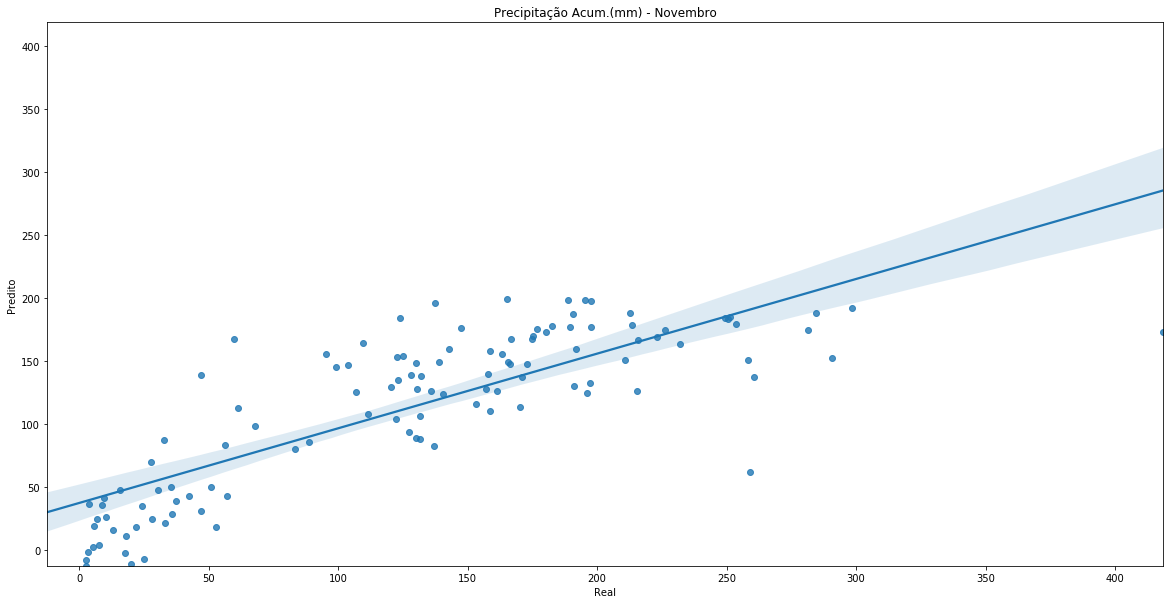

In [497]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)
plt.xlim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.ylim((min(y_test.min(),y_pred.min())-.003,max(y_test.max(),y_pred.max())+.003))
plt.xlabel('Real')
plt.ylabel('Predito')
plt.title(target[0] + ' - Novembro')
plt.savefig('../Validacao/graph/Prep_nov.png')

In [498]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_prep_erros.loc[11]=['Novembro',len(data_mean_nov),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_prep_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,37.510750,1.205030,183.695954,34.583108,0.641902,0.639517,37.510750,2603.047724,0.103355,26.106599
2,Fevereiro,458,33.159208,0.191505,119.654368,27.096310,0.666240,0.663382,33.159208,1833.743073,0.151138,26.367933
3,Março,458,42.744374,0.279754,126.412417,30.180133,0.535875,0.479875,42.744374,2737.921952,0.190652,37.533674
4,Abril,461,31.565042,0.183774,161.285655,25.597788,0.706531,0.702085,31.565042,1651.598608,0.227812,28.499556
5,Maio,461,28.325301,0.307733,330.530794,38.727082,0.720498,0.719289,28.325301,2302.109586,0.227812,15.824775
6,Junho,467,26.170436,0.152857,205.117739,34.517146,0.661843,0.655682,26.170436,1876.325128,0.227812,14.100512
7,Julho,467,16.584849,0.208956,116.592930,19.703291,0.816188,0.813534,16.584849,663.276864,0.227812,9.444405
8,Agosto,468,11.338750,0.128096,67.842939,12.974029,0.846670,0.845516,11.338750,296.892674,0.227812,7.004236
9,Setembro,470,19.964212,0.170606,85.036943,17.668617,0.745360,0.744445,19.964212,710.749779,0.227812,13.363333
10,Outubro,458,22.550785,0.985632,85.615153,17.162823,0.724329,0.724230,22.550785,803.100397,0.226313,18.129462


In [499]:
pickle.dump(mlp,open('../Models/Prep/prep_11.model2','wb'),protocol=2)

## Dezembro

In [500]:
data_mean_dez = pd.read_csv('../Dados/Brasil_12_mean.csv')

In [523]:
X_train, X_test, y_train, y_test = train_test_split(data_mean_dez[features], 
                                                    data_mean_dez[target],test_size=.25)

scaler_x = MinMaxScaler(feature_range=(0.1,.9))
scaler_y = MinMaxScaler(feature_range=(0.1,.9))

scaler_x.fit(X_train)
X_train = scaler_x.transform(X_train)
X_test  = scaler_x.transform(X_test)

scaler_y.fit(y_train)
y_train = scaler_y.transform(y_train)
y_test  = scaler_y.transform(y_test)

mlp = MLPRegressor(hidden_layer_sizes=(2*len(features)+1), activation='logistic', solver='lbfgs', alpha=0.0001, 
                  batch_size='auto',learning_rate='constant', learning_rate_init=0.09, power_t=0.5, max_iter=1000, shuffle=True, 
                   random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
                   early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)

mlp = mlp.fit(X_train,y_train.ravel())
y_pred = mlp.predict(X_test)

y_test = scaler_y.inverse_transform(y_test).ravel()
y_pred = scaler_y.inverse_transform([y_pred,]).ravel()

variance = metrics.explained_variance_score(y_test,y_pred)
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
#MSLE = metrics.mean_squared_log_error(y_test,y_pred)
MedLE = metrics.median_absolute_error(y_test,y_pred)
r2_score = metrics.r2_score(y_test,y_pred)

print('Variance: {}'.format(variance))
print('MAE: {}'.format(MAE))
print('MSE: {}'.format(MSE))
print('MSLE: {}'.format(MSLE))
print('MedLE: {}'.format(MedLE))
print('R2 Score: {}'.format(r2_score))
errors=abs(y_test-y_pred)
print('\nError(UR_true - UR_pred)\n')
print('MIN: {} \nMAX: {} \nMEAN: {}\nStd: {}'.format(errors.min(),errors.max(),errors.mean(),errors.std()))

Variance: 0.6626398690541142
MAE: 36.594135757088985
MSE: 2115.7094922812444
MSLE: 0.2263127563316283
MedLE: 31.46306262500704
R2 Score: 0.6419560280510941

Error(UR_true - UR_pred)

MIN: 0.2898159617132592 
MAX: 194.00465197351812 
MEAN: 36.594135757088985
Std: 27.86716204555079


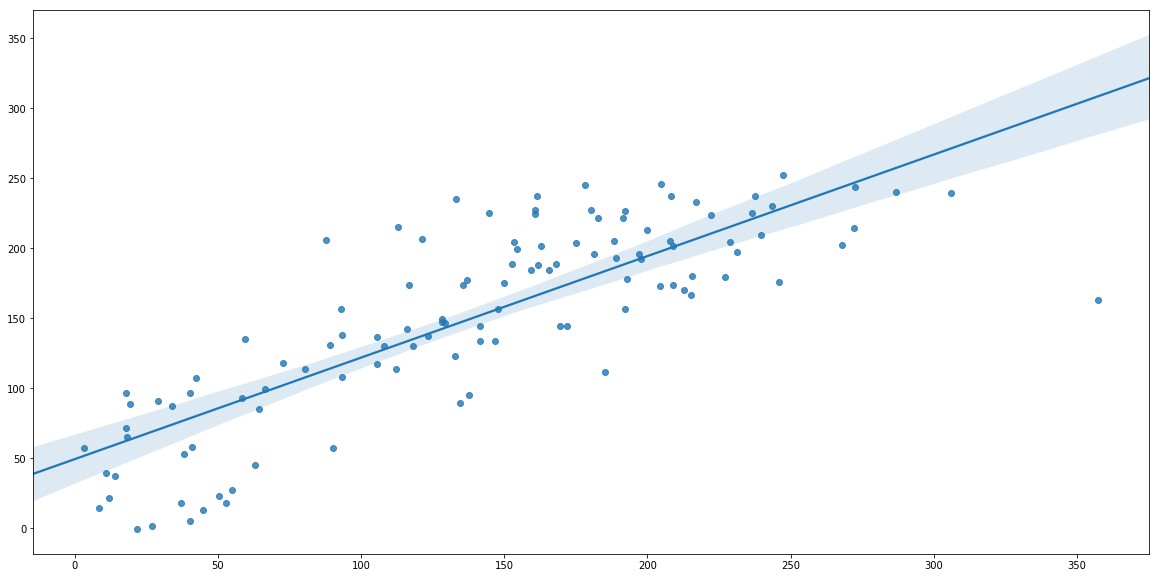

In [524]:
fig,ax = plt.subplots(figsize=(20,10))
sns.regplot(y_test, y_pred,ax=ax)

In [525]:
#['Month','ER_mean','ER_min','ER_max','ER_std','Variance','R2_score','MAE','MSE','MSLE','MedLE']
data_prep_erros.loc[12]=['Dezembro',len(data_mean_dez),errors.mean(),errors.min(),errors.max(),errors.std(),variance,r2_score,MAE,MSE,MSLE,MedLE]
data_prep_erros

,Month,Qto_estacoes,ER_mean,ER_min,ER_max,ER_std,Variance,R2_score,MAE,MSE,MSLE,MedLE
1,Janeiro,458,37.510750,1.205030,183.695954,34.583108,0.641902,0.639517,37.510750,2603.047724,0.103355,26.106599
2,Fevereiro,458,33.159208,0.191505,119.654368,27.096310,0.666240,0.663382,33.159208,1833.743073,0.151138,26.367933
3,Março,458,42.744374,0.279754,126.412417,30.180133,0.535875,0.479875,42.744374,2737.921952,0.190652,37.533674
4,Abril,461,31.565042,0.183774,161.285655,25.597788,0.706531,0.702085,31.565042,1651.598608,0.227812,28.499556
5,Maio,461,28.325301,0.307733,330.530794,38.727082,0.720498,0.719289,28.325301,2302.109586,0.227812,15.824775
6,Junho,467,26.170436,0.152857,205.117739,34.517146,0.661843,0.655682,26.170436,1876.325128,0.227812,14.100512
7,Julho,467,16.584849,0.208956,116.592930,19.703291,0.816188,0.813534,16.584849,663.276864,0.227812,9.444405
8,Agosto,468,11.338750,0.128096,67.842939,12.974029,0.846670,0.845516,11.338750,296.892674,0.227812,7.004236
9,Setembro,470,19.964212,0.170606,85.036943,17.668617,0.745360,0.744445,19.964212,710.749779,0.227812,13.363333
10,Outubro,458,22.550785,0.985632,85.615153,17.162823,0.724329,0.724230,22.550785,803.100397,0.226313,18.129462


In [526]:
pickle.dump(mlp,open('../Models/Prep/prep_12.model2','wb'),protocol=2)

### Salvando as mestricas de avaliação

In [527]:
data_prep_erros.to_csv('../Validacao/Prep.csv',float_format='%.3f')

In [226]:
data_std = pd.DataFrame(columns=['Mês','Tmax','Tmin','URmax','URmin','Precipitação'])

In [227]:
data_std['Mês'] = ['Janeiro','Fevereiro','Março','Abril','Maio','Junho','Julho','Agosto','Setembro','Outubro','Novembro','Dezembro']

for column,target_std in zip(['Tmax','Tmin','URmax','URmin','Precipitação'],
                             ['TEMPERATURA MAXIMA (C)','TEMPERATURA MINIMA (C)','UMIDADE RELATIVA DO MAXIMA AR (%)','UMIDADE RELATIVA DO MINIMA AR (%)',target[0]]):
    data_std[column] =[data_mean_jan[target_std].std(),data_mean_fev[target_std].std(),
                       data_mean_mar[target_std].std(),data_mean_abr[target_std].std(),
                       data_mean_mai[target_std].std(),data_mean_jun[target_std].std(),
                       data_mean_jul[target_std].std(),data_mean_ago[target_std].std(),
                       data_mean_set[target_std].std(),data_mean_out[target_std].std(),
                       data_mean_nov[target_std].std(),data_mean_dez[target_std].std()]
data_std


,Mês,Tmax,Tmin,URmax,URmin,Precipitação
0,Janeiro,1.775655,1.801156,6.832995,7.117130,89.733540
1,Fevereiro,1.666223,1.695128,6.708873,7.152496,81.234274
2,Março,2.098516,2.118605,6.338988,6.717542,89.156286
3,Abril,2.639405,2.666834,5.910778,6.365415,81.281428
4,Maio,3.843669,3.827771,7.140832,7.688150,74.918331
5,Junho,4.477436,4.412019,8.935864,9.486202,61.747505
6,Julho,4.411764,4.319171,11.501585,12.026824,59.366311
7,Agosto,4.182997,4.066033,13.716423,14.040964,45.457938
8,Setembro,4.155611,4.020234,13.210058,13.366882,50.788990
9,Outubro,3.411434,3.312872,10.646891,10.811372,55.615575


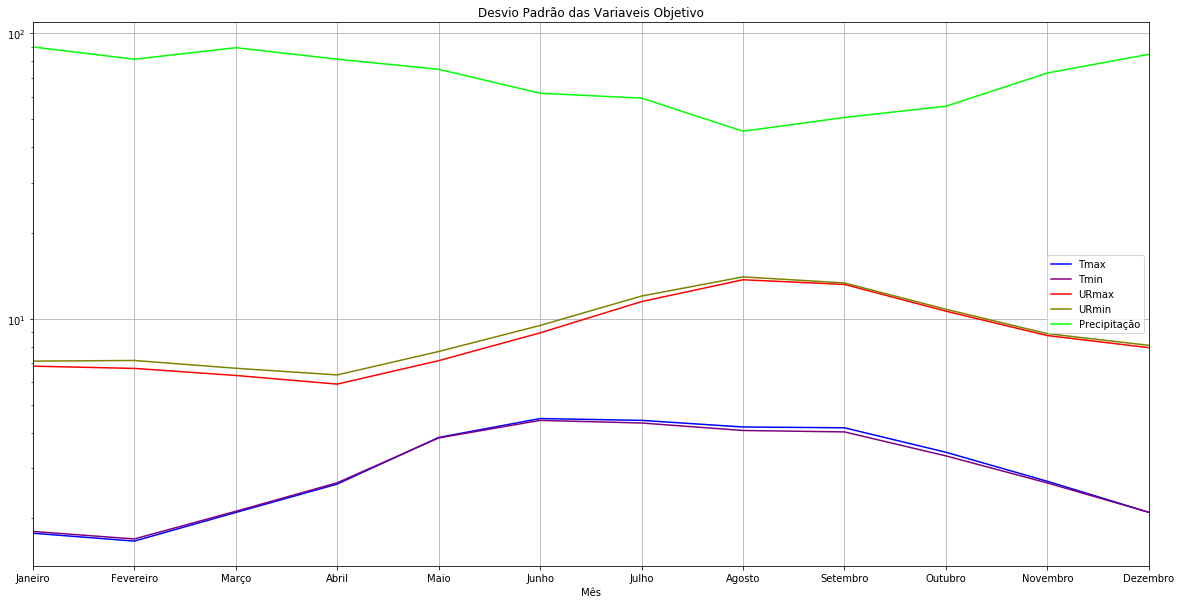

In [229]:
data_std.plot('Mês',grid=True,figsize=(20,10),xticks=[0,1,2,3,4,5,6,7,8,9,10,11],
              title='Desvio Padrão das Variaveis Objetivo',kind='line',xlim=(0,11),colormap='brg',
             logy=True)
plt.savefig('std.png')